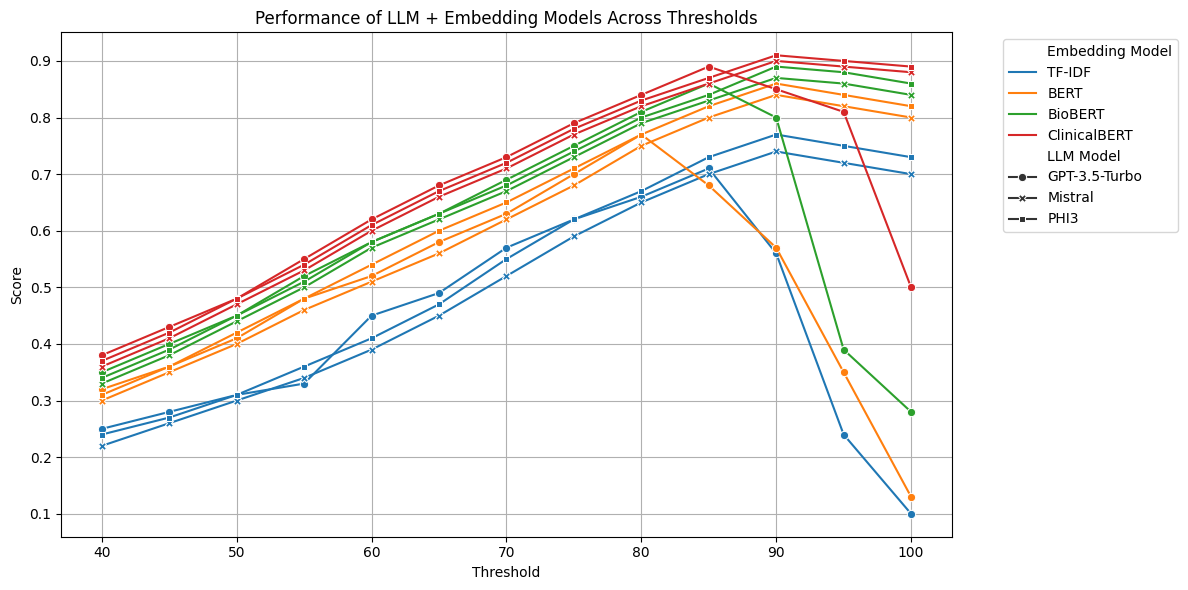

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----- Step 1: Prepare the data -----
data = {
    'LLM Model': ['GPT-3.5-Turbo']*4 + ['Mistral']*4 + ['PHI3']*4,
    'Embedding Model': ['TF-IDF', 'BERT', 'BioBERT', 'ClinicalBERT']*3,
    'th=40': [0.25,0.32,0.35,0.38,0.22,0.30,0.33,0.36,0.24,0.31,0.34,0.37],
    'th=45': [0.28,0.36,0.40,0.43,0.26,0.35,0.38,0.41,0.27,0.36,0.39,0.42],
    'th=50': [0.31,0.41,0.45,0.48,0.30,0.40,0.44,0.47,0.31,0.42,0.45,0.48],
    'th=55': [0.33,0.48,0.52,0.55,0.34,0.46,0.50,0.53,0.36,0.48,0.51,0.54],
    'th=60': [0.45,0.52,0.58,0.62,0.39,0.51,0.57,0.60,0.41,0.54,0.58,0.61],
    'th=65': [0.49,0.58,0.63,0.68,0.45,0.56,0.62,0.66,0.47,0.60,0.63,0.67],
    'th=70': [0.57,0.63,0.69,0.73,0.52,0.62,0.67,0.71,0.55,0.65,0.68,0.72],
    'th=75': [0.62,0.70,0.75,0.79,0.59,0.68,0.73,0.77,0.62,0.71,0.74,0.78],
    'th=80': [0.66,0.77,0.81,0.84,0.65,0.75,0.79,0.82,0.67,0.77,0.80,0.83],
    'th=85': [0.71,0.68,0.86,0.89,0.70,0.80,0.83,0.86,0.73,0.82,0.84,0.87],
    'th=90': [0.56,0.57,0.80,0.85,0.74,0.84,0.87,0.90,0.77,0.86,0.89,0.91],
    'th=95': [0.24,0.35,0.39,0.81,0.72,0.82,0.86,0.89,0.75,0.84,0.88,0.90],
    'th=100': [0.10,0.13,0.28,0.50,0.70,0.80,0.84,0.88,0.73,0.82,0.86,0.89]
}

df = pd.DataFrame(data)

# Melt dataframe for line plot
df_melt = df.melt(id_vars=['LLM Model', 'Embedding Model'], 
                  var_name='Threshold', 
                  value_name='Score')

# Convert threshold from string to numeric
df_melt['Threshold'] = df_melt['Threshold'].str.replace('th=', '').astype(int)

# ----- Step 2: Line Plot -----
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melt, x='Threshold', y='Score', 
             hue='Embedding Model', style='LLM Model', markers=True, dashes=False)
plt.title('Performance of LLM + Embedding Models Across Thresholds')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




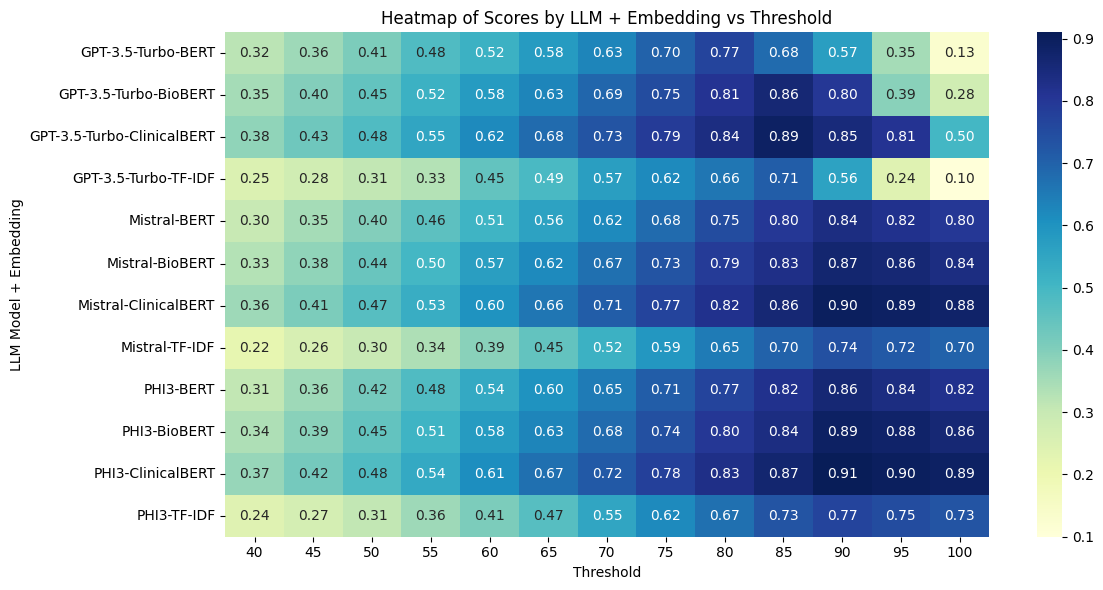

In [2]:
# ----- Step 3: Heatmap -----
# Create a pivot table for heatmap
df_heat = df_melt.pivot_table(index=['LLM Model', 'Embedding Model'], 
                              columns='Threshold', values='Score')

plt.figure(figsize=(12,6))
sns.heatmap(df_heat, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Scores by LLM + Embedding vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('LLM Model + Embedding')
plt.tight_layout()
plt.show()